## Using Keras to predict handwritten images

In this exercise we will use MNIST dataset to identify image data.

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Splitting the data in train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Dimensions of image
x_train[0].shape

(28, 28)

In [3]:
#The corresponding label 
y_train[333]

8

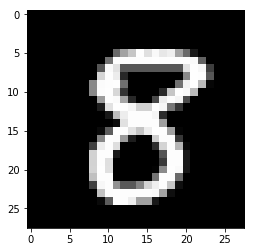

In [4]:
#The corresponding image
plt.imshow(x_train[333], cmap='Greys_r')

In [5]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [6]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

# Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [7]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [8]:
#Building the model
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

In [10]:
batch_size = 128  # mini-batch with 128 examples
epochs = 100
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.4943 - acc: 0.8509 - val_loss: 0.2055 - val_acc: 0.9379
Epoch 2/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2393 - acc: 0.9291 - val_loss: 0.1465 - val_acc: 0.9566
Epoch 3/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1945 - acc: 0.9421 - val_loss: 0.1253 - val_acc: 0.9612
Epoch 4/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1711 - acc: 0.9494 - val_loss: 0.1130 - val_acc: 0.9647
Epoch 5/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1518 - acc: 0.9555 - val_loss: 0.1051 - val_acc: 0.9681
Epoch 6/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1417 - acc: 0.9583 - val_loss: 0.1048 - val_acc: 0.9693
Epoch 7/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1299 - acc: 0.9603 - val_loss: 0.1004 - 

60000/60000 [==============================] - 3s 53us/step - loss: 0.0701 - acc: 0.9807 - val_loss: 0.1207 - val_acc: 0.9772
Epoch 60/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0734 - acc: 0.9804 - val_loss: 0.1153 - val_acc: 0.9772
Epoch 61/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0709 - acc: 0.9806 - val_loss: 0.1216 - val_acc: 0.9768
Epoch 62/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.0720 - acc: 0.9807 - val_loss: 0.1268 - val_acc: 0.9744
Epoch 63/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0700 - acc: 0.9808 - val_loss: 0.1201 - val_acc: 0.9761
Epoch 64/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0731 - acc: 0.9804 - val_loss: 0.1310 - val_acc: 0.9773
Epoch 65/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0714 - acc: 0.9804 - val_loss: 0.1257 - val_acc: 0.9770
Epoch 66/100
60000/60000 [==============

In [11]:
#Print the score
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14879233044656812
Test accuracy: 0.976


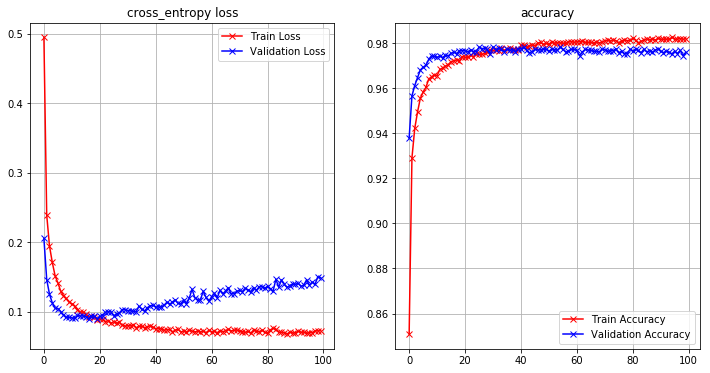

In [12]:
#Plot the score
def plot_score(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_score(history)